# a) Linear Regression 

# Program 1 - Implementation of Linear regression(From scratch and SKlearn)

# Part1 - Importing modules and defining class for Linear Regression

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
     

class LinearRegression:
    def fit(self,X,y):
        m = X.shape[0]
        X_mean, y_mean = np.mean(X), np.mean(y)
        X_mean_diff, y_mean_diff = X-X_mean, y-y_mean
        self.b1 = (X_mean_diff @ y_mean_diff) / (X_mean_diff @ X_mean_diff)
        self.b0 = y_mean - (self.b1 * X_mean)
        print(f"(b0,b1):({self.b0:.3f},{self.b1:.3f})")
        return self
    
    def predict(self,X):
        return self.b0 + X*self.b1

    def evaluate(self,X,y):
        y_pred = self.predict(X)
        y_diff,y_mean_diff  = y-y_pred , y-np.mean(y)
        rmse = np.sqrt(y_diff @ y_diff/X.shape[0])
        ss_tot = y_mean_diff @ y_mean_diff
        ss_res = y_diff @ y_diff
        r2 = 1 - ss_res/ss_tot
        print("Root mean squared Error:",rmse)
        print("R^2 value:",r2)

# Part 2 - Ploting function for regression

In [ ]:
 def regression_plot(X,y,model,title=""):
        plt.figure(figsize=(14,7))
        plt.title(title)
        plt.xlabel("Head Size(cm^3)")
        plt.ylabel("Brain Weights(grams)")
    
        x_line = np.array([np.min(X) - 100,np.max(X) + 100]).reshape(-1,1)
        y_line = model.predict(x_line)
    
        plt.scatter(X, y,c='orange', label='Original Data Points')
        plt.plot(x_line, y_line,linewidth=4, label='Regression Line')
        plt.legend()

# Part 3 - Loading and processing the dataset

In [17]:
data = pd.read_csv('C:/datasets/headbrain.csv')
print("size:",data.size,"; shape",data.shape)
data.head()  

size: 948 ; shape (237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


# Part 4 - Implementing Linear Regression from scratch

(b0,b1):(325.573,0.263)
Root mean squared Error: 72.12062137837091
R^2 value: 0.639311719957


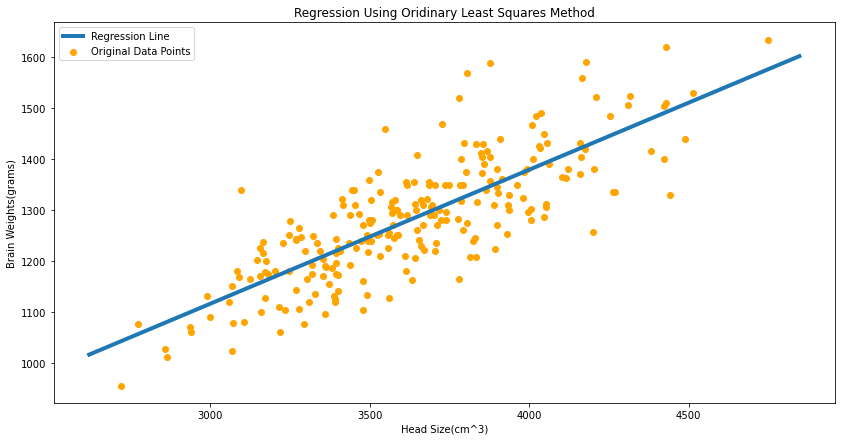

In [18]:
X = data['Head Size(cm^3)'].values
y = data['Brain Weight(grams)'].values
     

lin_reg_model= LinearRegression()
lin_reg_model.fit(X,y)
regression_plot(X,y,lin_reg_model,title="Regression Using Oridinary Least Squares Method")
lin_reg_model.evaluate(X,y)

# Part 5 - Implementing Linear Regression using Scikit Learn

Root Mean Squared Error: 72.1206213783709
R^2 value: 0.639311719957


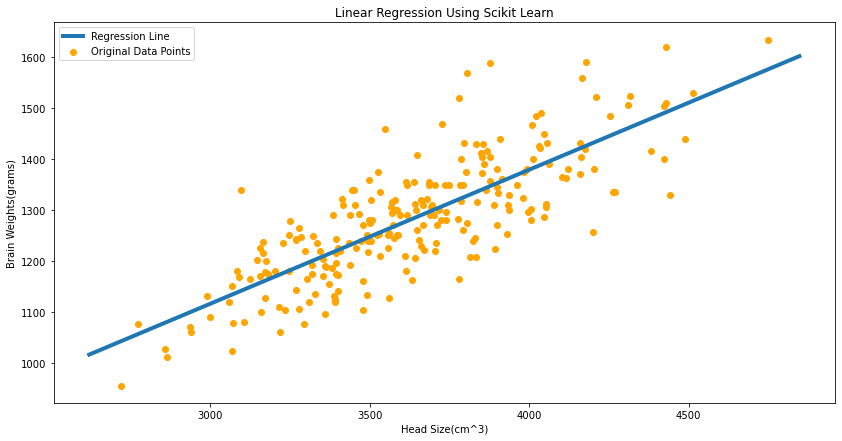

In [19]:
from sklearn.linear_model import LinearRegression as SkLinearRegression
from sklearn.metrics import mean_squared_error
X1 = X.reshape(-1,1)
     

sk_lin_reg_model = SkLinearRegression().fit(X1, y)

regression_plot(X1,y,sk_lin_reg_model,title="Linear Regression Using Scikit Learn")

y_hat = sk_lin_reg_model.predict(X1)
rmse = np.sqrt(mean_squared_error(y, y_hat))
r2_score = sk_lin_reg_model.score(X1, y)
print("Root Mean Squared Error:",rmse)
print("R^2 value:",r2_score)